In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plot style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('./survey_data.csv')

# Combine influencingFactors columns into a single list per row
factor_cols = [col for col in df.columns if col.startswith('influencingFactors')]
df['influencingFactors'] = df[factor_cols].apply(
    lambda row: [x for x in row if pd.notnull(x)], axis=1
)

# Optionally drop the individual influencingFactors columns
df = df.drop(columns=factor_cols)

# Preview cleaned data
print(df.head())

# Example: Frequency counts for preferredLayout
print("\nPreferred Layout Counts:")
print(df['preferredLayout'].value_counts())

# Example: Frequency for satisfactionLevel
print("\nSatisfaction Level Counts:")
print(df['satisfactionLevel'].value_counts())

# Example: Flatten all influencing factors and count
all_factors = df['influencingFactors'].explode()
print("\nInfluencing Factors Counts:")
print(all_factors.value_counts())

                        _id preferredLayout shoppingFrequency  favoriteDevice  \
0  68e4dc3afe259ecca90bb12e               B            Rarely      Smartphone   
1  68e4dfd1fe259ecca90bb12f               A            Weekly  Desktop/Laptop   
2  68e4f1d3fe259ecca90bb130               A            Rarely      Smartphone   
3  68e502f8fe259ecca90bb131               B           Monthly      Smartphone   
4  68e51498fe259ecca90bb132               A            Weekly  Desktop/Laptop   

  satisfactionLevel                                           comments  \
0         Satisfied                                                NaN   
1    Very satisfied  I like the purple - option B - to replace the ...   
2         Satisfied                                                NaN   
3         Satisfied                                                NaN   
4    Very satisfied                                                NaN   

                  submittedAt  \
0  2025-10-07T09:24:10.300123   
1 

## Categorical Analysis & Charts

C:\Users\User\AppData\Local\Temp\ipykernel_28364\2488629737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layout_counts.index, y=layout_counts.values, palette="Blues")


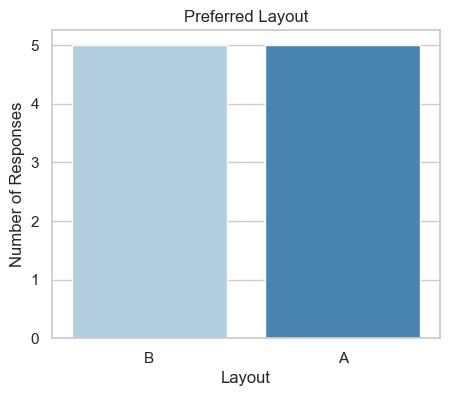

In [3]:
layout_counts = df['preferredLayout'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=layout_counts.index, y=layout_counts.values, palette="Blues")
plt.title("Preferred Layout")
plt.xlabel("Layout")
plt.ylabel("Number of Responses")
plt.show()

In [4]:
N = len(df)
layout_counts = df['preferredLayout'].value_counts()
layout_props = df['preferredLayout'].value_counts(normalize=True)

print("Total responses:", N)
print("Counts:\n", layout_counts)
print("Proportions:\n", layout_props)

Total responses: 10
Counts:
 preferredLayout
B    5
A    5
Name: count, dtype: int64
Proportions:
 preferredLayout
B    0.5
A    0.5
Name: proportion, dtype: float64


In [5]:
# Parameters
z = 1.96  # 95% confidence
n = N
p = layout_props.get('A', 0)

margin_error = z * ((p * (1 - p)) / n) ** 0.5
print(f"Margin of error for Layout A: {margin_error:.3f} ({margin_error*100:.1f}%)")

Margin of error for Layout A: 0.310 (31.0%)


In [6]:
# Statistical summary
N = len(df)
layout_counts = df['preferredLayout'].value_counts()
layout_props = df['preferredLayout'].value_counts(normalize=True)

print("Total responses:", N)
print("Counts:\n", layout_counts)
print("Proportions:\n", layout_props)

# Margin of error calculation for each option
z = 1.96
results = []
for value, count in layout_counts.items():
    p = count / N
    margin_error = z * ((p * (1 - p)) / N) ** 0.5
    results.append({
        "Option": value,
        "Count": count,
        "Proportion": p,
        "Margin of Error (%)": margin_error * 100
    })

pd.DataFrame(results)

Total responses: 10
Counts:
 preferredLayout
B    5
A    5
Name: count, dtype: int64
Proportions:
 preferredLayout
B    0.5
A    0.5
Name: proportion, dtype: float64


,Option,Count,Proportion,Margin of Error (%)
0,B,5,0.5,30.990321
1,A,5,0.5,30.990321


## Shopping Frequency

C:\Users\User\AppData\Local\Temp\ipykernel_28364\3892968834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_counts.index, y=freq_counts.values, palette="Purples")


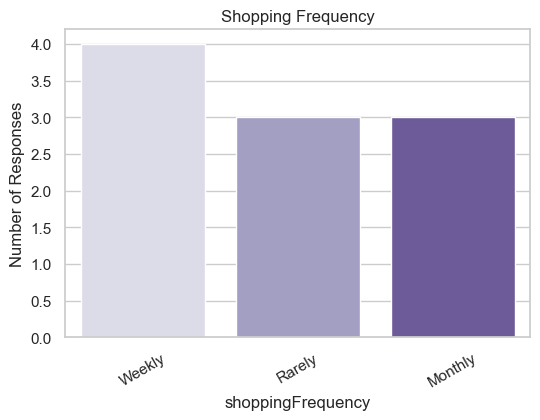

In [7]:
freq_counts = df['shoppingFrequency'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=freq_counts.index, y=freq_counts.values, palette="Purples")
plt.title("Shopping Frequency")
plt.ylabel("Number of Responses")
plt.xticks(rotation=30)
plt.show()

## Favorite Device

C:\Users\User\AppData\Local\Temp\ipykernel_28364\887599217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette="Greens")


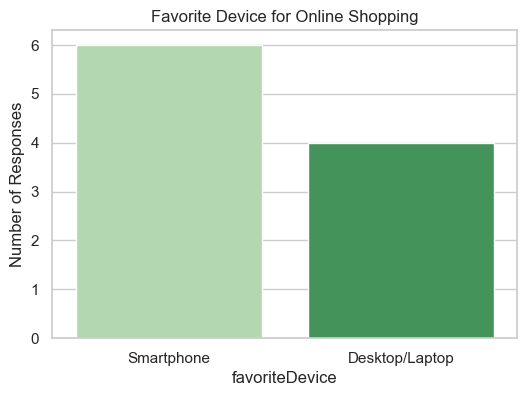

In [8]:
device_counts = df['favoriteDevice'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=device_counts.index, y=device_counts.values, palette="Greens")
plt.title("Favorite Device for Online Shopping")
plt.ylabel("Number of Responses")
plt.show()

## Satisfaction Level

C:\Users\User\AppData\Local\Temp\ipykernel_28364\3563667227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sat_counts.index, y=sat_counts.values, palette="Oranges")


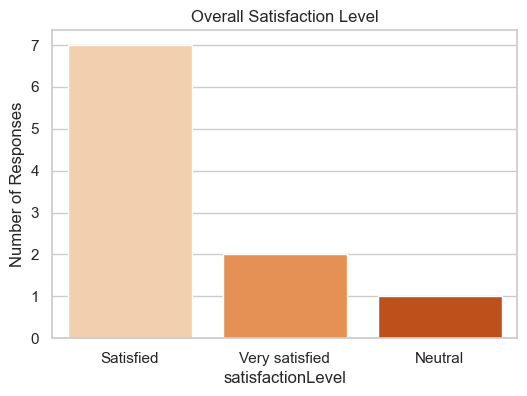

In [9]:
sat_counts = df['satisfactionLevel'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sat_counts.index, y=sat_counts.values, palette="Oranges")
plt.title("Overall Satisfaction Level")
plt.ylabel("Number of Responses")
plt.show()

## Multi-select Analysis (Influencing Factors)

C:\Users\User\AppData\Local\Temp\ipykernel_28364\1420544138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factor_counts.index, y=factor_counts.values, palette="coolwarm")


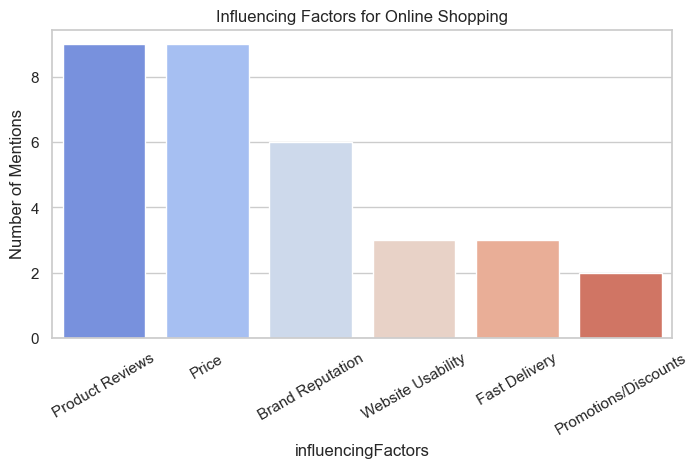

In [10]:
all_factors = df['influencingFactors'].explode()
factor_counts = all_factors.value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=factor_counts.index, y=factor_counts.values, palette="coolwarm")
plt.title("Influencing Factors for Online Shopping")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=30)
plt.show()

## Satisfaction by Preferred Layout

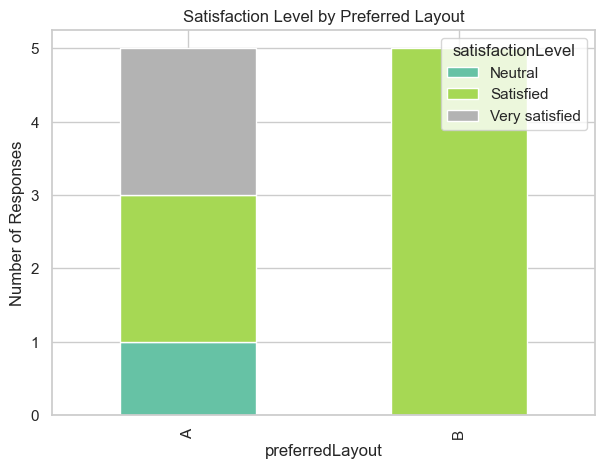

In [11]:
cross_tab = pd.crosstab(df['preferredLayout'], df['satisfactionLevel'])
cross_tab.plot(kind='bar', stacked=True, colormap='Set2', figsize=(7,5))
plt.title("Satisfaction Level by Preferred Layout")
plt.ylabel("Number of Responses")
plt.show()

In [12]:
summary = df.describe(include='all')
summary

,_id,preferredLayout,shoppingFrequency,favoriteDevice,satisfactionLevel,comments,submittedAt,influencingFactors
count,10,10,10,10,10,2,10,10
unique,10,2,3,2,3,2,10,9
top,68e4dc3afe259ecca90bb12e,B,Weekly,Smartphone,Satisfied,I like the purple - option B - to replace the ...,2025-10-07T09:24:10.300123,"[Price, Product Reviews, Brand Reputation]"
freq,1,5,4,6,7,1,1,2


# Conclusion

## Key Findings

Based on the analysis of 10 survey responses collected for the online shopping interface study, several important insights have emerged:

### 1. Layout Preference - No Clear Winner
- **Layout A and Layout B received equal preference** (50% each, 5 responses each)
- This suggests both layouts have merit and appeal to different user preferences
- **High uncertainty**: With a margin of error of ±31%, the sample size is insufficient to declare a statistically significant preference
- **Recommendation**: A larger sample size (n≥100) is needed to establish statistical significance

### 2. User Satisfaction - Generally Positive
- **70% of users reported being "Satisfied"** with their online shopping experience
- **20% were "Very Satisfied"** 
- Only **10% were "Neutral"** - no negative satisfaction responses
- This indicates the current interface designs are performing well overall

### 3. Shopping Behavior Insights
- **Device Usage**: Users show clear preferences for either smartphones or desktop/laptop computers
- **Shopping Frequency**: Mix of weekly, monthly, and occasional shoppers represented
- This diversity suggests the interface should accommodate different usage patterns

### 4. Critical Success Factors
The most influential factors for online shopping decisions are:
1. **Product Reviews (90% mention rate)** - Most critical factor
2. **Price (90% mention rate)** - Equally important as reviews
3. **Brand Reputation (60% mention rate)** - Significant but secondary
4. **Website Usability, Fast Delivery, and Promotions** - Important but less frequently mentioned

### 5. Cross-Analysis Insights
- Both layout preferences show similar satisfaction distributions
- No clear correlation between layout choice and satisfaction level
- This suggests both layouts are functionally effective

## Limitations and Recommendations

### Sample Size Limitations
- **N=10 is too small** for reliable statistical inference
- Margin of error of ±31% makes conclusions tentative
- **Recommend collecting at least 100-200 responses** for meaningful A/B testing

### Next Steps
1. **Expand sample size** significantly before making design decisions
2. **Focus on product reviews and pricing displays** as these are the most influential factors
3. **Ensure mobile optimization** given smartphone usage patterns
4. **Consider implementing user feedback mechanisms** to continuously monitor satisfaction
5. **Test specific UI elements** related to the top influencing factors (reviews, pricing, brand reputation)

### Business Implications
While the current analysis cannot definitively choose between Layout A and B, it provides valuable direction for:
- Prioritizing product review features and pricing transparency
- Maintaining high satisfaction levels across both designs
- Planning a more comprehensive user research study

**The equal preference split suggests both layouts have strengths worth preserving in future designs.**